In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df1 = pd.read_csv('../debugArray_x.csv', header=None)
df2 = pd.read_csv('../debugArray_x.csv', header=None)


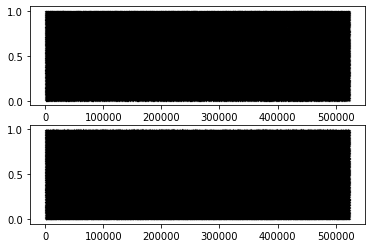

In [46]:
fig,ax = plt.subplots(2, figsize=(10,10))
ax[0].scatter(x=list(df1.index), y=df1.loc[:, 0], s=0.01, c='k')
ax[1].scatter(x=list(df2.index), y=df2.loc[:, 0], s=0.01, c='k')

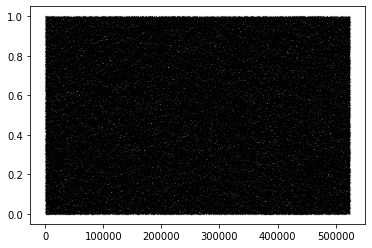

In [42]:
plt.scatter(x=list(df2.index), y=df2.loc[:, 0], s=0.01, c='k')

(array([52429., 52429., 52429., 52428., 52429., 52429., 52428., 52429.,
        52429., 52429.]),
 array([     0. ,  52428.7, 104857.4, 157286.1, 209714.8, 262143.5,
        314572.2, 367000.9, 419429.6, 471858.3, 524287. ]),
 <BarContainer object of 10 artists>)

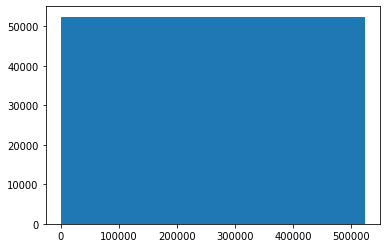

In [7]:
plt.hist(list(df.index), bins=10, )